In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
foldernames_to_id={"VeryMildDemented":1, "NonDemented":0, "ModerateDemented":2, "MildDemented":3}
import os
import torch

In [4]:
modelname="BasicCNN3"
LR=0.001
DO=0.2

In [41]:
from PIL import Image
from numpy import asarray
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers,models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os.path
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.1) # set validation split

In [44]:
foldername='/content/drive/My Drive/ml_project/Dataset/'
train_images = train_datagen.flow_from_directory(
    foldername,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_images = train_datagen.flow_from_directory(
    foldername , # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
    ) # set as validation data

Found 30586 images belonging to 4 classes.
Found 3398 images belonging to 4 classes.


In [8]:
def create_model():
  model = tf.keras.models.Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.2),
    Dense(256, activation = 'relu'),
    Dropout(0.2),
    Dense(4, activation = 'softmax')
])
  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
  return model

In [9]:
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [10]:
checkpointdir='/content/drive/My Drive/ml_project/Checkpoints/'
checkpoint_path = checkpointdir+modelname+"training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [16]:
model.load_weights(checkpoint_path)

In [45]:
#Evaluate the model
loss, acc = model.evaluate(validation_images, verbose=2)
print("trained model, accuracy: {:5.2f}%".format(100 * acc))

107/107 - 42s - loss: 0.1004 - accuracy: 0.9644 - 42s/epoch - 388ms/step
trained model, accuracy: 96.44%


In [46]:
y_pred=model.predict(validation_images)

107/107 [==============================] - 44s 413ms/step


In [47]:
labels=validation_images.classes
y_pred=y_pred.argmax(axis=1)
print(labels.shape)
print(y_pred.shape)

(3398,)
(3398,)


In [50]:
classes= ["VeryMildDemented","NonDemented", "ModerateDemented", "MildDemented"]

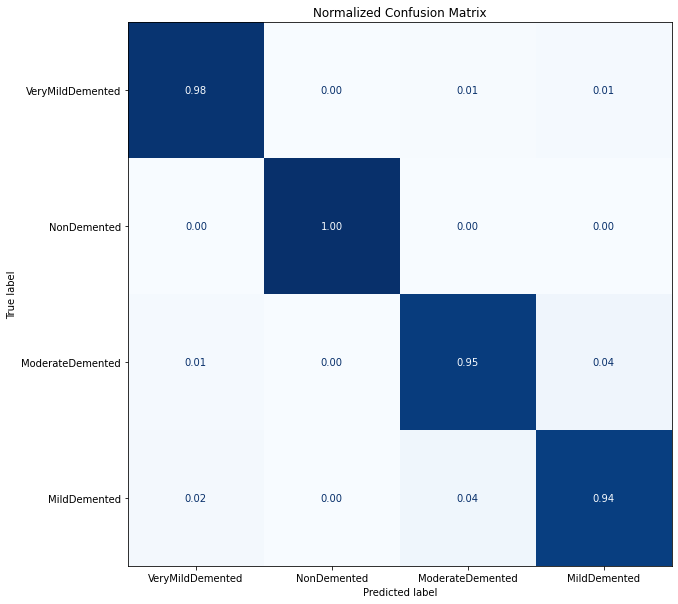

In [55]:
cm = confusion_matrix(y_true=labels,  y_pred=y_pred, normalize="true")
fig, ax=plt.subplots(figsize=(15,10))
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap="Blues",values_format=".2f", ax=ax, colorbar=False)
plt.title("Normalized Confusion Matrix")
plt.show()

In [12]:
batch_size = 32
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_best_only=True,
    save_weights_only=True)

In [14]:
history = model.fit(train_images,
    steps_per_epoch=len(train_images),
    validation_data=validation_images,
    validation_steps=len(validation_images),
    epochs=300,
    callbacks=[cp_callback])

Epoch 1/300
956/956 [==============================] - ETA: 0s - loss: 0.9397 - accuracy: 0.5626 
Epoch 1: saving model to /content/drive/My Drive/ml_project/Checkpoints/BasicCNN3training_1/cp.ckpt
956/956 [==============================] - 12742s 13s/step - loss: 0.9397 - accuracy: 0.5626 - val_loss: 0.6650 - val_accuracy: 0.7016
Epoch 2/300
956/956 [==============================] - ETA: 0s - loss: 0.6322 - accuracy: 0.7194
Epoch 2: saving model to /content/drive/My Drive/ml_project/Checkpoints/BasicCNN3training_1/cp.ckpt
956/956 [==============================] - 1081s 1s/step - loss: 0.6322 - accuracy: 0.7194 - val_loss: 0.4392 - val_accuracy: 0.8243
Epoch 3/300
956/956 [==============================] - ETA: 0s - loss: 0.4643 - accuracy: 0.7971
Epoch 3: saving model to /content/drive/My Drive/ml_project/Checkpoints/BasicCNN3training_1/cp.ckpt
956/956 [==============================] - 1092s 1s/step - loss: 0.4643 - accuracy: 0.7971 - val_loss: 0.3545 - val_accuracy: 0.8476
Epoch 4

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-89833ef4f280>", line 1, in <module>
    history = model.fit(train_images,
  File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1414, in fit
    callbacks.on_train_batch_end(end_step, logs)
  File "/usr/local/lib/python3.8/dist-packages/keras/callbacks.py", line 438, in on_train_batch_end
    self._call_batch_hook(ModeKeys.TRAIN, 'end', batch, logs=logs)
  File "/usr/local/lib/python3.8/dist-packages/keras/callbacks.py", line 297, in _call_batch_hook
    self._call_batch_end_hook(mode, batch, logs)
  File "/usr/local/lib/python3.8/dist-packages/keras/callbacks.py", line 318, in _call_batch_end_hook
    self._ca

KeyboardInterrupt: ignored

basic model overfit starting from epoch 9

In [ ]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

2 following cells are for loading latest trained models

In [ ]:
# Create a basic model instance
#model = create_model()

# Evaluate the model
#loss, acc = model.evaluate(validation_images, verbose=2)
#print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
# Loads the weights
#p='/content/drive/My Drive/ml_project/Checkpoints/BasicCNN-training/cp-"

#fill in the best model filename like 0004
#best_checkpoint_path=p+""+"".ckpt"
#latest = tf.train.latest_checkpoint(checkpoint_dir)
#model.load_weights(latest)

# Re-evaluate the model
#loss, acc = model.evaluate(validation_images, verbose=2)
#print("Restored model, accuracy: {:5.2f}%".format(100 * acc))